<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Text_analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text analysis

This notebook shows how to work with text in Python. 

In this notebook we make use of Dutch 'troonredes' (yearly speech by the King or Queen) as our toy dataset for exploring the different options available when working with text in Python, while making use of the Spacy package [https://spacy.io].

In [2]:
!pip install -U spacy
!python -m spacy download nl_core_news_lg

import spacy
nlp = spacy.load("nl_core_news_lg")

     |████████████████████████████████| 6.0 MB 19.7 MB/s 
     |████████████████████████████████| 451 kB 47.3 MB/s 
     |████████████████████████████████| 181 kB 64.4 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 41.1 MB/s 
     |████████████████████████████████| 628 kB 50.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 572.6

# Loading the data

In [8]:
import pandas as pd
troonredes = pd.read_csv("https://raw.githubusercontent.com/Jlokkerbol/masterclass/main/troonredes.csv")
troonredes.Tekst[0]

'Leden der Staten-Generaal,\nIn de regeringsverklaring heeft het kabinet twee jaar geleden een beleid uiteengezet om te komen tot behoud van welvaart en tot herstel van werkgelegenheid. Dat beleid is aangeduid als het driesporenbeleid: een overheid die minder schulden maakt: een krachtig bedrijfsleven dat voor meer werk kan gaan zorgen: een samenleving waarin werk zo georganiseerd wordt, dat ieder weer de kans krijgt zich daarin te ontplooien.\nUit de begroting die U vandaag wordt voorgelegd, blijkt dat de offers die worden gebracht, niet voor niets zijn. De werkgelegenheid neemt eindelijk weer toe; het tekort van de overheid daalt. De collectieve uitgaven waren in het verleden veel te sterk gestegen. Dat heeft geleid tot te hoge tekorten en tot te hoge belastingen en sociale premies. Nu loopt, ondanks de nog steeds stijgende rentelasten, het aandeel van de collectieve uitgaven in het nationaal inkomen langzaam maar zeker terug.\nHet wordt daardoor mogelijk om — voor het eerst sinds ve

In [5]:
troonredes['Tekst']

0     Leden der Staten-Generaal,\nIn de regeringsver...
1     Leden van de Staten-Generaal,\nDe gunstige wen...
2     Leden van de Staten-Generaal,\nDit jaar wordt ...
3     Leden van de Staten-Generaal,\nDat ik vandaag ...
4     Leden van de Staten-Generaal,\nMeer dan ooit i...
5     Leden van de Staten-Generaal,\nNa de vervroegd...
6     Leden van de Staten-Generaal,\nDe inval van Ir...
7     Leden van de Staten-Generaal,\n1992 wordt geen...
8     Leden van de Staten-Generaal,\nBeelden van gew...
9     Leden van de Staten-Generaal,\nVerbondenheid t...
10    Leden van de Staten-Generaal,\nVijftig jaar ge...
11    Leden van de Staten-Generaal,\nVeel landen in ...
12    Leden van de Staten-Generaal,\nDe toekomst van...
13    Leden van de Staten Generaal,\nDankzij de insp...
14    Leden van de Staten-Generaal,\nIn deze tijd va...
15    “Mijne Heeren! \nHet is Mij aangenaam U bijeen...
16    Leden van de Staten-Generaal,\nAan het begin v...
17    Leden van de Staten-Generaal, \nDe afschuw

# Exploring the data

Using Spacy's functionality, it is quite easy (and fast) to work with text

In [7]:
example_text = nlp(troonredes.Tekst[0])

In [10]:
for token in example_text:
  print(token)

Leden
der
Staten-Generaal
,


In
de
regeringsverklaring
heeft
het
kabinet
twee
jaar
geleden
een
beleid
uiteengezet
om
te
komen
tot
behoud
van
welvaart
en
tot
herstel
van
werkgelegenheid
.
Dat
beleid
is
aangeduid
als
het
driesporenbeleid
:
een
overheid
die
minder
schulden
maakt
:
een
krachtig
bedrijfsleven
dat
voor
meer
werk
kan
gaan
zorgen
:
een
samenleving
waarin
werk
zo
georganiseerd
wordt
,
dat
ieder
weer
de
kans
krijgt
zich
daarin
te
ontplooien
.


Uit
de
begroting
die
U
vandaag
wordt
voorgelegd
,
blijkt
dat
de
offers
die
worden
gebracht
,
niet
voor
niets
zijn
.
De
werkgelegenheid
neemt
eindelijk
weer
toe
;
het
tekort
van
de
overheid
daalt
.
De
collectieve
uitgaven
waren
in
het
verleden
veel
te
sterk
gestegen
.
Dat
heeft
geleid
tot
te
hoge
tekorten
en
tot
te
hoge
belastingen
en
sociale
premies
.
Nu
loopt
,
ondanks
de
nog
steeds
stijgende
rentelasten
,
het
aandeel
van
de
collectieve
uitgaven
in
het
nationaal
inkomen
langzaam
maar
zeker
terug
.


Het
wordt
daardoor
mogelijk
om
—
voor

In [77]:
# visualize named entities
spacy.displacy.render(example_text, style='ent', jupyter=True)

In [20]:
example_text[5:30]

In de regeringsverklaring heeft het kabinet twee jaar geleden een beleid uiteengezet om te komen tot behoud van welvaart en tot herstel van werkgelegenheid.

In [21]:
# visualize dependencies
spacy.displacy.render(example_text[5:30], style='dep', jupyter=True)


Another useful feature of Spacy is that you can search for specific (rule-based) combinations, such as all combinations of Adjectives and Nouns

In [45]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [46]:
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}]
matcher.add("ADJ_NOUN_PATTERN", [pattern])

In [48]:
doc = nlp(troonredes.Tekst[0])
matches = matcher(doc)
print("Total matches found:", len(matches))

Total matches found: 121


In [49]:
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Match found: krachtig bedrijfsleven
Match found: collectieve uitgaven
Match found: hoge tekorten
Match found: hoge belastingen
Match found: sociale premies
Match found: collectieve uitgaven
Match found: nationaal inkomen
Match found: rechtvaardiger verdeling
Match found: zogenaamde tweeverdienersmaatregel
Match found: feitelijke draagkracht
Match found: sociale premies
Match found: forse lastenverlichting
Match found: lagere arbeidskosten
Match found: eerste plaats
Match found: collectieve arbeidsovereenkomsten
Match found: geringe prijsstijging
Match found: lagere belastingen
Match found: agrarische sector
Match found: moeilijke periode
Match found: Pijnlijke aanpassingen
Match found: aparte plaats
Match found: technologische vernieuwingen
Match found: internationale produktiestructuur
Match found: grote inspanning
Match found: hoge eisen
Match found: ander werk
Match found: wetenschappelijk onderzoek
Match found: moeilijk proces
Match found: andere werkroosters
Match found: flexibele

# Preparing the data

One of the main goals in preparing the text data is often to reduce dimensionality, such that it is easier to work with this type of data, for example when using words as features in a machine learning pipeline. Spacy has built-in functionalities to remove stopwords, perform lemmatization, and/or filter out words that do not pass a certain threshold regarding frequency, or importance, making it very easy to prepare text data.

In [50]:
print(list(nlp.Defaults.stop_words))

['evenwel', 'eigen', 'zou', 'enz', 'moet', 'u', 'jezelf', 'hebben', 'geheel', 'erdoor', 'iets', 'eerder', 'uwe', 'weinige', 'misschien', 'vandaan', 'opdat', 'vanaf', 'mochten', 'beide', 'elk', 'geen', 'doch', 'precies', 'zeker', 'had', 'aan', 'hadden', 'inzake', 'weldra', 'echter', 'alle', 'opnieuw', 'hierin', 'wij', 'wanneer', 'buiten', 'gekund', 'ook', 'mogen', 'ten', 'den', 'zulke', 'tijdens', 'idd', 'hier', 'door', 'behalve', 'onder', 'welk', 'men', 'omlaag', 'voor', 'jou', 'wilde', 'vervolgens', 'zijnde', 'ikzelf', 'eveneens', 'zekere', 'totdat', 'omtrent', 'nabij', 'alleen', 'meer', 'mogelijk', 'bijvoorbeeld', 'omhoog', 'nr', 'omdat', 'doorgaand', 'voorts', 'ja', 'zo', 'pas', 'jouw', 'het', 'liet', 'net', 'bovenal', 'was', 'en', 'daar', 'wier', 'nooit', 'konden', 'hare', 'hij', 'zouden', 'heeft', 'beneden', 'gewoonweg', 'vanwege', 'zei', 'niets', 'geworden', 'onszelf', 'zijne', 'ondertussen', 'jullie', 'veel', 'vrij', 'anders', 'daarheen', 'ikke', 'allen', 'voort', 'later', 'kon'

In [53]:
def tokenize_simple(text):
    """Tokenizer returning lowercase tokens with no stop words, no punctuation and no words with encoding errors"""
    doc = nlp(text)
    return [token.lower_ for token in doc if not (token.is_stop or token.is_punct or ("\\" in token.lower_))]

tokenize_simple(troonredes.Tekst[0])

['leden',
 'staten-generaal',
 '\n',
 'regeringsverklaring',
 'kabinet',
 'twee',
 'jaar',
 'beleid',
 'uiteengezet',
 'komen',
 'behoud',
 'welvaart',
 'herstel',
 'werkgelegenheid',
 'beleid',
 'aangeduid',
 'driesporenbeleid',
 'overheid',
 'schulden',
 'maakt',
 'krachtig',
 'bedrijfsleven',
 'werk',
 'gaan',
 'zorgen',
 'samenleving',
 'waarin',
 'werk',
 'georganiseerd',
 'kans',
 'krijgt',
 'ontplooien',
 '\n',
 'begroting',
 'vandaag',
 'voorgelegd',
 'blijkt',
 'offers',
 'gebracht',
 'werkgelegenheid',
 'neemt',
 'eindelijk',
 'tekort',
 'overheid',
 'daalt',
 'collectieve',
 'uitgaven',
 'verleden',
 'sterk',
 'gestegen',
 'geleid',
 'hoge',
 'tekorten',
 'hoge',
 'belastingen',
 'sociale',
 'premies',
 'loopt',
 'ondanks',
 'stijgende',
 'rentelasten',
 'aandeel',
 'collectieve',
 'uitgaven',
 'nationaal',
 'inkomen',
 'langzaam',
 'terug',
 '\n',
 'daardoor',
 'vele',
 'jaren',
 'zien',
 'belastingverhoging',
 'tevens',
 'gewerkt',
 'rechtvaardiger',
 'verdeling',
 'belast

In [57]:
print("Length of text before preprocessing:", len(example_text))
print("Length of text after preprocessing: ", len(tokenize_simple(troonredes.Tekst[0])))


Length of text before preprocessing: 2503
Length of text after preprocessing:  1093


# Analysis

In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

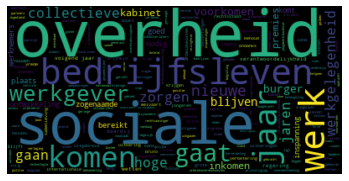

In [65]:
text = ' '.join(tokenize_simple(troonredes.Tekst[0])).lower()
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [67]:
!pip install textstat
import textstat

     |████████████████████████████████| 101 kB 9.3 MB/s 
     |████████████████████████████████| 2.0 MB 32.6 MB/s 


In [68]:
textstat.flesch_reading_ease(troonredes.Tekst[0])

53.0

This score is on a 0 (very confusing) to 100 (very easy) scale. A score between 50 and 59 is considered to be fairly difficult. For more text statistics, please refer to the documentation of textstat at https://pypi.org/project/textstat/ 

# To Conclude

This notebook showed a glimpse of the possibilities of working with text in Python, where we used Spacy for preprocessing the text data. For other applications, such as supervised and unsupervised learning, and for more general background information, please refer to the link to Spacy mentioned at the top of this notebook or make use of the many tutorials available in this space.